In [90]:
import pickle
import pandas as pd
import plotly.express as px
import numpy as np

In [72]:
# Read in etf data from pkl file

pkl_file = open('etf_df.pkl', 'rb')
dataframe2 = pickle.load(pkl_file)
pkl_file.close()

# load etf data back into Dataframe
all_etf_df = pd.DataFrame(dataframe2)

# Convert month end prices to monthly percentage change and drop na values

all_etf_df = all_etf_df.pct_change().dropna()



In [24]:
# Map etfs to countries

etf_country_map = {
    "Finland":"iShares MSCI Finland Capped",
    "Denmark":"iShares MSCI Denmark Capped",
    "Norway":"iShares MSCI Norway Capped",
    "Netherlands":"iShares MSCI Netherlands",
    "Switzerland":"iShares MSCI Switzerland Capped",
    "Sweden":"iShares MSCI Sweden Capped",
    "New Zealand":"iShares MSCI New Zealand Capped",
    "Canada":"iShares MSCI Canada",
    "Austria":"iShares MSCI Austria Capped",
    "Australia":"iShares MSCI Australia",
    "Israel":"iShares MSCI Israel Capped",
    "United Kingdom":"iShares MSCI United Kingdom",
    "United States":"ishares S&P 500",
    "Ireland":"iShares MSCI Ireland",
    "Germany":"iShares Currency Hedged MSCI Germany",
    "Mexico":"iShares MSCI Mexico Capped",
    "Benchmark":"iShares MSCI World"
}

In [73]:
# pull this in from countries pkl file when available

country_score_2019 = {
    "Finland":7.769, 
    "Denmark":7.6,
    "Norway":7.554,
    "Netherlands":7.494,
    "Switzerland":7.488,
    "Sweden":7.48,
    "New Zealand":7.307, 
    "Canada":7.278, 
    "Austria":7.246, 
    "Australia":7.228, 
    "Israel":7.167, 
    "United Kingdom":7.054
}


In [30]:
sum_2019_scores = sum(country_score_2019.values())
sum_2019_scores

88.665

In [74]:
# not used in any calc but may be useful to show countries that we couldn't get data for / change in number of countried included per year

number_countries_2019 = len(country_score_2019)
number_countries_2019

12

In [36]:
portfolio_weight_2019 = {}

for country in country_score_2019:
    etf = etf_country_map[country] 
    weighting = country_score_2019[country]/sum_2019_scores
    portfolio_weight_2019.update({etf:weighting})

portfolio_weight_2019

{'iShares MSCI Finland Capped': 0.08762194778097332,
 'iShares MSCI Denmark Capped': 0.08571589691535554,
 'iShares MSCI Norway Capped': 0.08519709017086786,
 'iShares MSCI Netherlands': 0.08452038572153611,
 'iShares MSCI Switzerland Capped': 0.08445271527660295,
 'iShares MSCI Sweden Capped': 0.08436248801669204,
 'iShares MSCI New Zealand Capped': 0.08241132352111882,
 'iShares MSCI Canada': 0.08208424970394179,
 'iShares MSCI Austria Capped': 0.0817233406642982,
 'iShares MSCI Australia': 0.08152032932949867,
 'iShares MSCI Israel Capped': 0.08083234647267805,
 'iShares MSCI United Kingdom': 0.07955788642643659}

In [102]:
# Empty dataframe to collect portfolio weights from below for loop
portfolio_2019_df = pd.DataFrame()

# Return * Portfolio Weight
for etf in portfolio_weight_2019:
    etf_column = all_etf_df[etf] * portfolio_weight_2019[etf]
    portfolio_2019_df[etf] = etf_column

# Filter Dates
portfolio_2019_df = portfolio_2019_df.loc['2019-01-01':'2019-12-31']
    
# Combined return for all funds and rename Happy Portfolio
portfolio_2019_df = pd.DataFrame(portfolio_2019_df.sum(axis=1), columns=['Happy Portfolio'])

# Add Benchmark
benchmark = "iShares MSCI World"

benchmark_return = pd.DataFrame(all_etf_df[benchmark])

# slice by date
benchmark_return = benchmark_return.loc["2019-01-01":"2019-12-31"]

portfolio_2019_df = pd.concat([portfolio_2019_df,benchmark_return], axis=1)
portfolio_2019_df

,Happy Portfolio,iShares MSCI World
date,,
2019-01-01,0.075637,0.077216
2019-02-01,0.025585,0.029779
2019-03-01,0.008274,0.014859
2019-04-01,0.031843,0.037166
2019-05-01,-0.051564,-0.057878
2019-06-01,0.033668,0.049101
2019-07-01,-0.017479,0.009229
2019-08-01,-0.022200,-0.021990
2019-09-01,0.022472,0.021594


In [116]:
# cumulative returns
cum_portfolio_2019 = (1 + portfolio_2019_df).cumprod()
cum_portfolio_2019


,Happy Portfolio,iShares MSCI World
date,,
2019-01-01,1.075637,1.077216
2019-02-01,1.103157,1.109294
2019-03-01,1.112285,1.125777
2019-04-01,1.147704,1.167618
2019-05-01,1.088523,1.100038
2019-06-01,1.125171,1.154051
2019-07-01,1.105504,1.164701
2019-08-01,1.080962,1.139090
2019-09-01,1.105253,1.163687


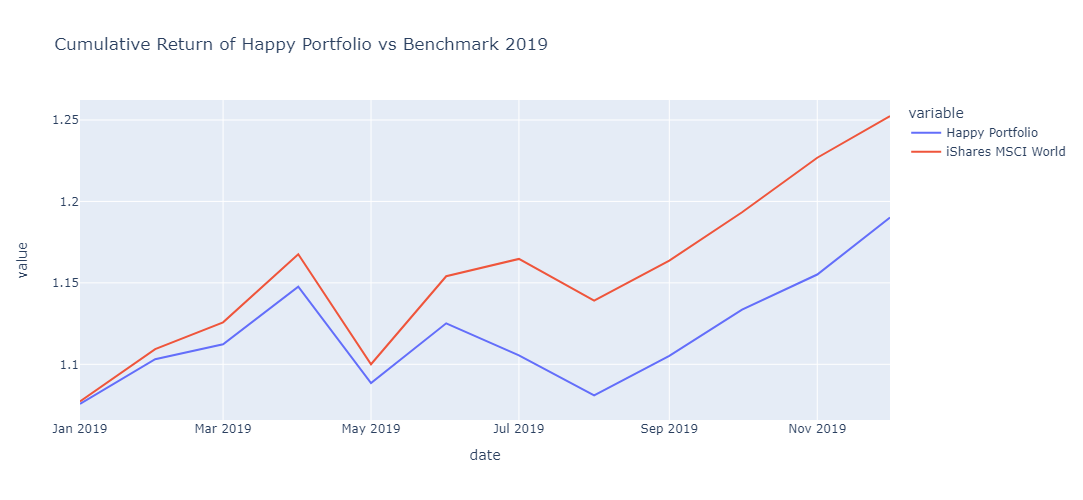

In [117]:
# Plot 2019 vs benchmark

fig = px.line(
    cum_portfolio_2019,
    title="Cumulative Return of Happy Portfolio vs Benchmark 2019",
    height=500,
    width=1200
)
fig.show()

In [107]:
portfolio_2019_df.describe()

,Happy Portfolio,iShares MSCI World
count,12.000000,12.000000
mean,0.015099,0.019458
std,0.032690,0.033813
min,-0.051564,-0.057878
25%,0.001836,0.013451
50%,0.024023,0.023545
75%,0.030705,0.031626
max,0.075637,0.077216


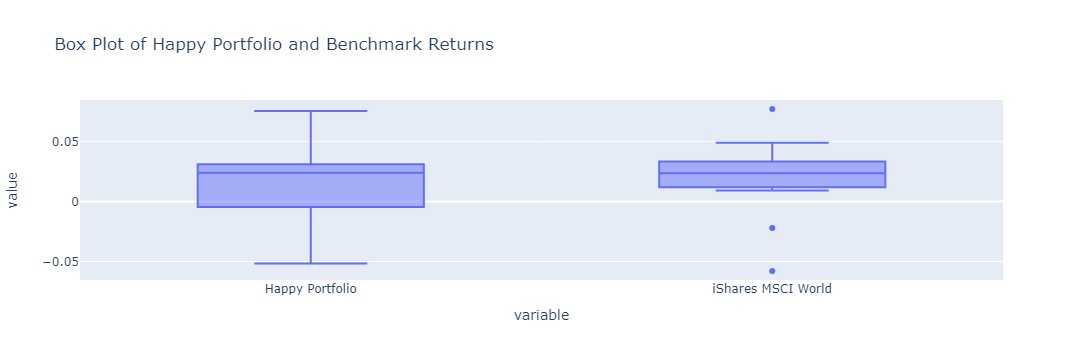

In [108]:
fig = px.box(
    portfolio_2019_df,
    title='Box Plot of Happy Portfolio and Benchmark Returns'
)
fig.show()

Happy Portfolio       0.181188
iShares MSCI World    0.233497
dtype: float64

Happy Portfolio       0.11324
iShares MSCI World    0.11713
dtype: float64

Happy Portfolio       1.600036
iShares MSCI World    1.993478
dtype: float64

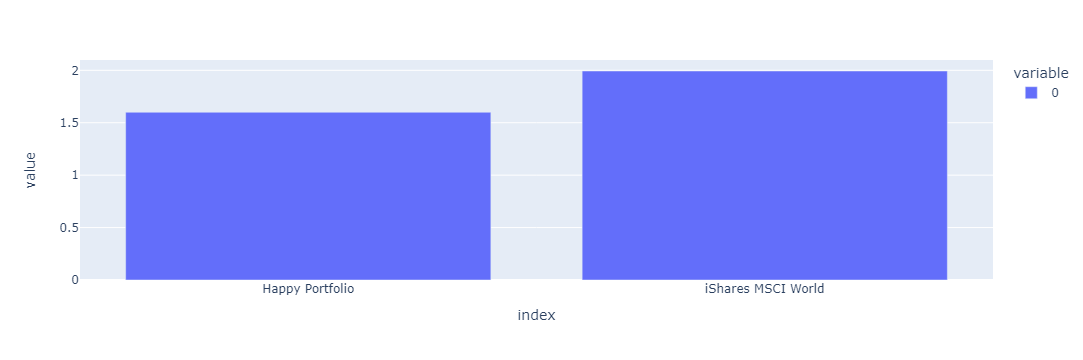

In [113]:
# Sharpe Ratio

average_annual_return = portfolio_2019_df.mean() * 12
display(average_annual_return)

annual_sd_portfolio = portfolio_2019_df.std() * np.sqrt(12)
display(annual_sd_portfolio)

sharpe_ratios = average_annual_return / annual_sd_portfolio
display(sharpe_ratios)

fig = px.bar(sharpe_ratios)
fig.show()

In [ ]:
# PULL IN WORLD HAPPINESS DF TO OBTAIN RANKINGS OR SCORE
# CREATE WEIGHTINGS VARIABLES PER YEAR
# CREATE PERFORMANCE VARIABLES BY YEAR BASED ON WEIGHTINGS AND RANKINGS 

